Importing the Libraries

In [1]:
import numpy as np  # used for array
import pandas as pd # used for data processing (data loading, data manipulation, etc)
import seaborn as sns # used for data visualization
from sklearn.model_selection import train_test_split  # used for splitting the data into training data and testing data
from sklearn import svm # importing support vector machine
from sklearn.metrics import accuracy_score # checking accuracy score for model on train and test data

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame

loan_dataset = pd.read_csv('train.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# .head() displays the first 5 rows, and first n columns

# python indexes the column and row number starting from 0.

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of data points & number of features
# .shape() gives number of rows x columns (38523,12)   
loan_dataset.shape

(614, 13)

In [6]:
# some statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# checking the number of missing values in each column again
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Label Encoding

In [10]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

# replacing Y with 1, and N with 0.

In [11]:
# Dependent column value_counts

loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [13]:
# dependent value_counts

loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization (comapring and plotting count plots to check for correlation amoung all features and target column)

<AxesSubplot:xlabel='Education', ylabel='count'>

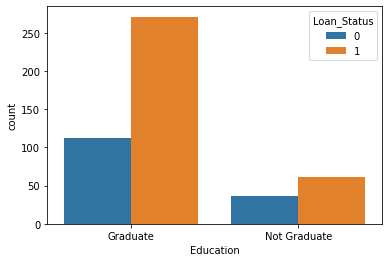

In [14]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

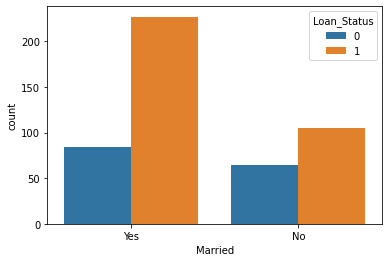

In [15]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [16]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<AxesSubplot:xlabel='Dependents', ylabel='count'>

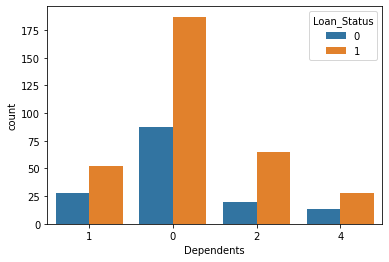

In [18]:
# number of dependents & Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

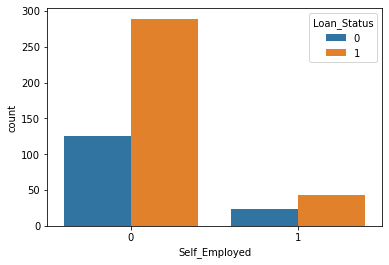

In [19]:
# self employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

In [20]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [21]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
# split the into 4 variables, X_train, X_test, Y_train, Y_test. 

# test_size is 10%, therefore 90% of the data and labels will be in X_train, Y_train, and remaining 10% will be in X_test, Y_test.

# stratify = Y references that we split the data according to Y

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [26]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
# checking the accuracy between predicted Y_train values, and actual Y_train values.

# storing the accuracy score for X_train data and Y_train label in X_train_prediction

# expected to have a high value, as the model is built and fitted according to the same trained data

In [27]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [28]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
# checking the accuracy between predicted Y_test values, and actual Y_test values.

# storing the accuracy score for X_test data and Y_test label in X_test_prediction

In [29]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334
